e4f88f4


c:\python-project\dataops\dataopsenv\lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'relaxing-parakeet.eastus.lakefsazcloud.io'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


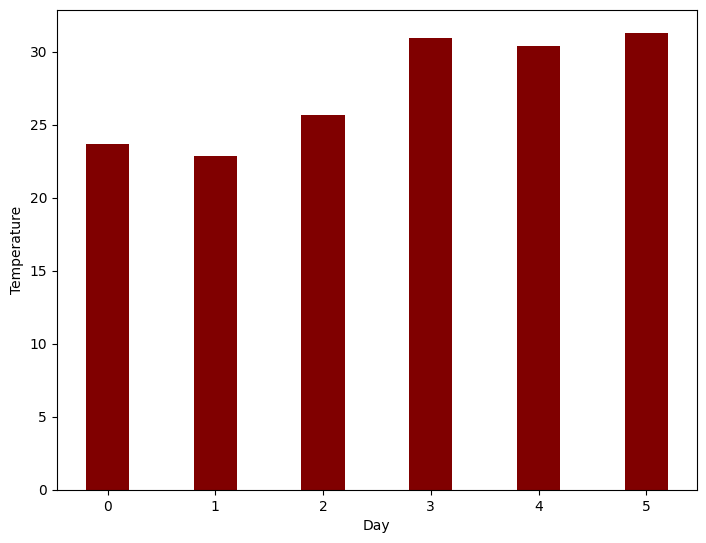

<Figure size 640x480 with 0 Axes>

In [5]:
from lakeFSconn import *
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

client = lakeFs_client()

environment = 'dev' # Using environment as a variable FFU, see at end of this guide
rawRepo = environment + "-cleansed"
featureBranch = 'e4f88f4'
fpath = 'cleansed/weather_cleased.csv'
print(featureBranch)

with (
        client.objects.get_object(repository=rawRepo, ref=featureBranch, path=fpath) as f,
        open('weather_cleased.csv', "wb") as o
    ):
    o.write(f.read())


df = pd.read_csv("weather_cleased.csv")

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(df.index, df['temperature'], color ='maroon', width = 0.4)
plt.xlabel("Day")
plt.ylabel("Temperature")
plt.savefig('TempPlotByDay.png')
plt.show()
plt.close()

AttributeError: 'Series' object has no attribute 'savefig'

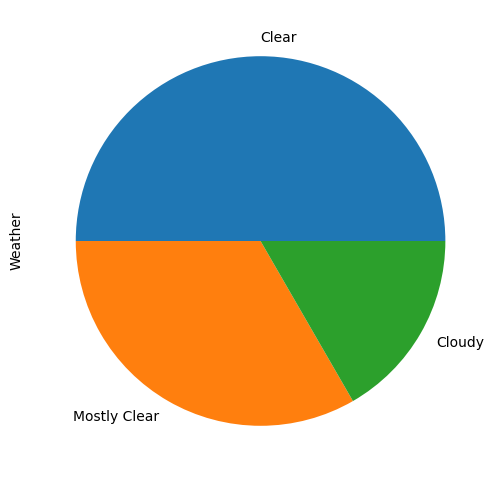

In [6]:
weather = dict(df['weatherCode'].value_counts())
series = pd.Series(weather.values(), index=weather.keys(), name="Weather")
series.plot.pie(figsize=(6, 6))